# Data Cleaning and Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import warnings
#warnings.filterwarnings('ignore')

I start by reading in the dataframe using pd.read_csv.

In [3]:
customer_data = pd.read_csv('1345_customer_results.csv')

In [4]:
customer_data.shape

(30293, 23)

In [5]:
customer_data.head()

,Case ID,Origin,Origin Created At,Content ID,URL,Labeling State,Series,Series Index,Patch,Qualified Reads,...,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Internal Notes,Comments,Explanation
0,5888087,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386,https://go.centaurlabs.com/problem/5888087,Gold Standard,NaN,NaN,NaN,2,...,1.000,'no',2,1.54,'yes',0,0.00,NaN,[],NaN
1,5888088,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387,https://go.centaurlabs.com/problem/5888088,Gold Standard,NaN,NaN,NaN,3,...,1.000,'no',3,2.34,'yes',0,0.00,NaN,[],NaN
2,5888089,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264388,https://go.centaurlabs.com/problem/5888089,Gold Standard,NaN,NaN,NaN,2,...,1.000,'no',2,1.70,'yes',0,0.00,NaN,[],NaN
3,5888090,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264389,https://go.centaurlabs.com/problem/5888090,Gold Standard,NaN,NaN,NaN,1,...,1.000,'no',1,0.82,'yes',0,0.00,NaN,[],NaN
4,5888091,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264390,https://go.centaurlabs.com/problem/5888091,In Progress,NaN,NaN,NaN,7,...,0.571,'yes',4,3.28,'no',3,2.32,NaN,[],NaN


I noticed that three columns seem to be filled with NaN data. This line of code aims to check if there are any datapoints in the columns 'Series', 'Series Index', and 'Patch' that are not an np.nan. The resulting subsetted dataframe is empty, meaning that all three columns are filled with NaN, meaning they should be dropped.

In [6]:
customer_data.loc[(customer_data['Series'].notna()) | (customer_data['Series Index'].notna()) | (customer_data['Patch'].notna())]

,Case ID,Origin,Origin Created At,Content ID,URL,Labeling State,Series,Series Index,Patch,Qualified Reads,...,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Internal Notes,Comments,Explanation


In [7]:
results_data = customer_data.drop(['Series', 'Series Index', 'Patch'], axis = 1)

Next, I know from the documentation that the Case ID value is unique to each case. For this reason, I'm going to set the Case ID as the index for the entire dataframe.

In [8]:
results_data.set_index('Case ID', inplace = True)

I see that many of the Internal Notes and Explanation values are np.nan, and the Comments are empty. I'm going to run a subsetting check to see if there is anything useful in any of those columns

In [9]:
results_data.loc[(results_data['Internal Notes'].notna()) | (results_data['Comments'] != '[]') | (results_data['Explanation'].notna())]

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Internal Notes,Comments,Explanation
Case ID,,,,,,,,,,,,,,,,,,,
5892332,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:43:57 PM,3268631,https://go.centaurlabs.com/problem/5892332,Gold Standard,1,'no','no',0.000,1.000,'no',1,0.80,'yes',0,0.00,NaN,['There was rapid and spiky rates so why am I ...,NaN
5894116,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:44:51 PM,3270415,https://go.centaurlabs.com/problem/5894116,Gold Standard,5,'no','yes',1.000,1.000,'yes',5,4.00,'no',0,0.00,NaN,['Can someone explain why the answer is “no”?'],NaN
5896433,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:46:04 PM,3272732,https://go.centaurlabs.com/problem/5896433,Gold Standard,3,'yes','no',1.000,1.000,'no',3,2.32,'yes',0,0.00,NaN,['??'],NaN
5899520,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:47:40 PM,3275819,https://go.centaurlabs.com/problem/5899520,Gold Standard,2,'yes','no',1.000,1.000,'no',2,1.58,'yes',0,0.00,NaN,"[""i can't see any spike in this question so wh...",NaN
5900998,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:48:26 PM,3277297,https://go.centaurlabs.com/problem/5900998,Gold Standard,2,'no','yes',1.000,1.000,'yes',2,1.56,'no',0,0.00,NaN,['There is obviously a peak happened in there'],NaN
5901914,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:48:54 PM,3278213,https://go.centaurlabs.com/problem/5901914,Gold Standard,6,'yes','no',1.000,1.000,'no',6,4.72,'yes',0,0.00,NaN,['No spike present'],NaN
5902040,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:48:58 PM,3278339,https://go.centaurlabs.com/problem/5902040,Gold Standard,2,'no','yes',1.000,1.000,'yes',2,1.58,'no',0,0.00,NaN,['How?'],NaN
5904120,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:53:07 PM,3280419,https://go.centaurlabs.com/problem/5904120,Gold Standard,1,'yes','no',1.000,1.000,'no',1,0.78,'yes',0,0.00,NaN,['How? '],NaN
5904413,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:53:16 PM,3280712,https://go.centaurlabs.com/problem/5904413,Gold Standard,3,'yes','no',1.000,1.000,'no',3,2.46,'yes',0,0.00,NaN,['Multiple?'],NaN


I'm glad I checked. There are multiple rows with comments that are worth checking. It also seems like where there are comments, there is some disagreement between answer choices. However, I don't see anything worthwhile in Internal Notes or Explanations, so I will drop those.

In [10]:
results_data.drop(['Internal Notes', 'Explanation'], axis = 1, inplace = True)

Next, I want to be able to sort out all the links in the 'Origin' column that either do not end with a Vote[N] or the [N] is a number that is not between 0 and 8 (e.g. 9). This N represents the number of experts that voted 'yes' to whether there was an abnormality in the medical image or not. I also have to consider the case where N = 4, meaning that the vote was split half in half. 

First, I'll subset a few of the links to get a good look at them:

In [11]:
results_data['Origin'].iloc[0]

'https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B14_time139137_medoid_vote2.jpg'

In [12]:
results_data['Origin'].iloc[1]

'https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B10_time178433_medoid_vote0.jpg'

In [13]:
results_data['Origin'].iloc[4000]

'https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/P10056_time115915_member_vote4.jpg'

In [14]:
from re import fullmatch

In [15]:
mask = results_data['Origin'].str.fullmatch(r'(.*)vote[0-8](.*)', case = False)
#creates a mask of where this is true and where it is not

Here, I'll use a mask to create a new dataset which is confirmed to have voting data. Then, I'll take a look at the data:

In [16]:
refined_data = results_data[mask]

In [17]:
refined_data.head()

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Comments
Case ID,,,,,,,,,,,,,,,,,
5888087,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386,https://go.centaurlabs.com/problem/5888087,Gold Standard,2,'no','no',0.0,1.000,'no',2,1.54,'yes',0,0.00,[]
5888088,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387,https://go.centaurlabs.com/problem/5888088,Gold Standard,3,'no','no',0.0,1.000,'no',3,2.34,'yes',0,0.00,[]
5888089,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264388,https://go.centaurlabs.com/problem/5888089,Gold Standard,2,'no','no',0.0,1.000,'no',2,1.70,'yes',0,0.00,[]
5888090,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264389,https://go.centaurlabs.com/problem/5888090,Gold Standard,1,'no','no',0.0,1.000,'no',1,0.82,'yes',0,0.00,[]
5888091,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264390,https://go.centaurlabs.com/problem/5888091,In Progress,7,NaN,'yes',NaN,0.571,'yes',4,3.28,'no',3,2.32,[]


Next, I understand that I'm going to be dropping the special case where the votes are equal. I've decided to subset this by using the same regex expression but using the specific case of "vote4". I used the mask approach to create a subsetted dataframe, which I will examine. 

In [18]:
equal_votes_mask = refined_data['Origin'].str.fullmatch(r'(.*)vote4(.*)', case = False)

In [19]:
refined_data = refined_data.loc[~equal_votes_mask]

In [20]:
refined_data.head()

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Comments
Case ID,,,,,,,,,,,,,,,,,
5888087,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386,https://go.centaurlabs.com/problem/5888087,Gold Standard,2,'no','no',0.0,1.0,'no',2,1.54,'yes',0,0.0,[]
5888088,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387,https://go.centaurlabs.com/problem/5888088,Gold Standard,3,'no','no',0.0,1.0,'no',3,2.34,'yes',0,0.0,[]
5888089,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264388,https://go.centaurlabs.com/problem/5888089,Gold Standard,2,'no','no',0.0,1.0,'no',2,1.70,'yes',0,0.0,[]
5888090,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264389,https://go.centaurlabs.com/problem/5888090,Gold Standard,1,'no','no',0.0,1.0,'no',1,0.82,'yes',0,0.0,[]
5888092,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:48 PM,3264391,https://go.centaurlabs.com/problem/5888092,Gold Standard,4,'no','no',0.0,1.0,'no',4,3.30,'yes',0,0.0,[]


In [21]:
refined_data['Labeling State'].unique()
#Notice that the only 'Labeling State' option is "Gold Standard" because we've successfully dropped all split-vote data

array(['Gold Standard'], dtype=object)

The task is to vette these labels and find a way to break the tie and turn them into "Gold Standard" labels. How are we supposed to do that? To label the medical images, we can use the qualified reads we are given in the data to break the tie. However, we need to prove that the crowdsourced data is reliable. This is where the idea comes in of showing that the crowd agrees with experts more than experts do with each other. 

I will start with this by creating columns that represent the number of experts that vote "yes". The origin link is helpful because I can source that number straight from there. 

In [23]:
import re

In [24]:
def calculate_experts(string = refined_data['Origin']):
    substring = re.search(r'vote[0-8]', string)
    return int(substring.group()[-1])
    

In [25]:
refined_data['Experts Voted Yes'] = refined_data['Origin'].apply(calculate_experts)

In [27]:
refined_data
#Across the cases, calculate percentage of qualified readers that vote 'yes' out of total people vs. percentage of experts 
#that vote yes out of total experts
#On a graph, show clumps of data and try to find a line of best fit

#If I want to gauge the accuracy, use heuristic to weigh their accuracy. 5 voters, say one voter has 90% accuracy,
#another has 80% accuracy, 

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Comments,Experts Voted Yes
Case ID,,,,,,,,,,,,,,,,,,
5888087,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386,https://go.centaurlabs.com/problem/5888087,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.54,'yes',0,0.00,[],2
5888088,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387,https://go.centaurlabs.com/problem/5888088,Gold Standard,3,'no','no',0.000,1.000,'no',3,2.34,'yes',0,0.00,[],0
5888089,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264388,https://go.centaurlabs.com/problem/5888089,Gold Standard,2,'no','no',0.000,1.000,'no',2,1.70,'yes',0,0.00,[],0
5888090,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264389,https://go.centaurlabs.com/problem/5888090,Gold Standard,1,'no','no',0.000,1.000,'no',1,0.82,'yes',0,0.00,[],0
5888092,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:48 PM,3264391,https://go.centaurlabs.com/problem/5888092,Gold Standard,4,'no','no',0.000,1.000,'no',4,3.30,'yes',0,0.00,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918374,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294673,https://go.centaurlabs.com/problem/5918374,Gold Standard,4,'yes','yes',0.000,1.000,'yes',4,3.18,'no',0,0.00,[],5
5918375,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294674,https://go.centaurlabs.com/problem/5918375,Gold Standard,2,'no','yes',1.000,1.000,'yes',2,1.56,'no',0,0.00,[],2
5918376,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294675,https://go.centaurlabs.com/problem/5918376,Gold Standard,3,'no','yes',0.667,0.667,'yes',2,1.56,'no',1,0.76,[],3


I've successfully created a column that directly tells us the amount of experts that voted yes. How can I use this to my advantage?

I think it will be helpful to analyze not just whether a label is 'yes' or 'no' but the amount of people that say 'yes' versus the total amount of people. This will allow me to convert the answers from simple binary data to continuous percentages. If I do this for both the experts (experts that say yes / total experts) and the qualified readers (n in crowd that say yes / total readers), then I can compare how much the readers agree with the experts. Otherwise, I wouldn't be able to quantify the amount that the crowd agrees with the experts.

Now I need to figure out a way to create those two columns:

In [28]:
refined_data['%Experts Voted Yes'] = refined_data['Experts Voted Yes']/8
#Here I create my percent column of experts voting yes

Creating the column of user percentages will be a bit harder just because of the way that the data is structured.

In [29]:
def percent_user_yes(data):
    if data['Majority Label'] == "'yes'":
        percent_value = data['First Choice Votes']/data['Qualified Reads']
    elif data['Majority Label'] == "'no'":
        percent_value = data['Second Choice Votes']/data['Qualified Reads']
    else:
        percent_value = np.nan
    return percent_value

#majority = refined_data['Majority Label'], firstc = refined_data['First Choice Votes'], secondc = refined_data['Second Choice Votes'], qualf = refined_data['Qualified Reads']

In [30]:
refined_data['%Readers Voted Yes'] = refined_data.apply(percent_user_yes, axis = 1)

Next, I want to create a column to eventually calculate Crowd Accuracy.

In [31]:
def accuracy(data):
    if data['Qualified Reads'] == 4:
        acc_value = 0.5
    if data['Majority Label'] == data['Correct Label']:
        acc_value = 1
    elif data['Majority Label'] == np.nan or data['Correct Label'] == np.nan:
        acc_value = np.nan
    elif data['Majority Label'] != data['Correct Label']:
        acc_value = 0
    return acc_value

In [32]:
refined_data['Crowd Accuracy'] = refined_data.apply(accuracy, axis = 1)

In [33]:
def reader_accuracy(data):
    if data['Qualified Reads'] > 0:
        if (data['Experts Voted Yes'] == 4):        
            readera = 0.5
        elif data['Majority Label'] == data['Correct Label']:
            readera = data['First Choice Votes']/data['Qualified Reads']
        elif (data['Majority Label'] != data['Correct Label']):
            readera = data['Second Choice Votes']/data['Qualified Reads']
    else:
        readera = np.nan
    return readera

In [34]:
refined_data['Reader Accuracy'] = refined_data.apply(reader_accuracy, axis = 1)

In [35]:
def expert_accuracy(data):
    if data['Correct Label'] == "'yes'":
        experta = data['%Experts Voted Yes']
    elif data['Correct Label'] == "'no'":
        experta = 1 - data['%Experts Voted Yes']
    else:
        experta = 0.5
    return experta

In [36]:
refined_data['Expert Accuracy'] = refined_data.apply(expert_accuracy, axis = 1)

I've created a dataset named "refined_data" where I've thrown out columns that I don't find useful and added columns that I can use to compare expert agreement and reader agreement.

In [42]:
refined_data.head()

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,...,Second Choice Answer,Second Choice Votes,Second Choice Weight,Comments,Experts Voted Yes,%Experts Voted Yes,%Readers Voted Yes,Crowd Accuracy,Reader Accuracy,Expert Accuracy
Case ID,,,,,,,,,,,,,,,,,,,,,
5888087,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386,https://go.centaurlabs.com/problem/5888087,Gold Standard,2,'no','no',0.0,1.0,...,'yes',0,0.0,[],2,0.25,0.0,1,1.0,0.75
5888088,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387,https://go.centaurlabs.com/problem/5888088,Gold Standard,3,'no','no',0.0,1.0,...,'yes',0,0.0,[],0,0.00,0.0,1,1.0,1.00
5888089,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264388,https://go.centaurlabs.com/problem/5888089,Gold Standard,2,'no','no',0.0,1.0,...,'yes',0,0.0,[],0,0.00,0.0,1,1.0,1.00
5888090,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264389,https://go.centaurlabs.com/problem/5888090,Gold Standard,1,'no','no',0.0,1.0,...,'yes',0,0.0,[],0,0.00,0.0,1,1.0,1.00
5888092,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:48 PM,3264391,https://go.centaurlabs.com/problem/5888092,Gold Standard,4,'no','no',0.0,1.0,...,'yes',0,0.0,[],0,0.00,0.0,1,1.0,1.00


In [43]:
refined_data['Experts Voted Yes'].unique() #notice 4 is not included, which means there are no split votes

array([2, 0, 1, 3, 5, 6, 7, 8], dtype=int64)

Here we can see that we've successfully created two columns: one that calculates the % of experts that agree on 'yes', and one that calculates the % of qualified readers (in other words, the crowd) that agree on 'yes'. With this data, it's time to finally move into Exploratory Data Analysis.

## Exploratory Data Analysis 1
Here I'm going to compare the percentage of experts that say "yes" to the percentage of readers that say "yes". The goal of this is to show where the experts agree with the readers and how often. I will use a scatterplot to see if there is a correlation between agreement of the readers and agreement of the experts. 

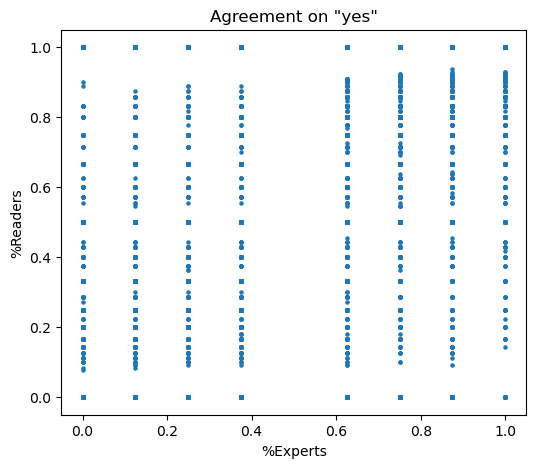

In [44]:
plt.figure(figsize = (6,5))

plt.scatter(refined_data['%Experts Voted Yes'], refined_data['%Readers Voted Yes'], s = 5)
plt.title('Agreement on "yes"')

plt.xlabel('%Experts')
plt.ylabel('%Readers')

plt.show()

Text(0.5, 1.0, 'Proportion of Readers that Vote "yes" At Each Proportion of Experts')

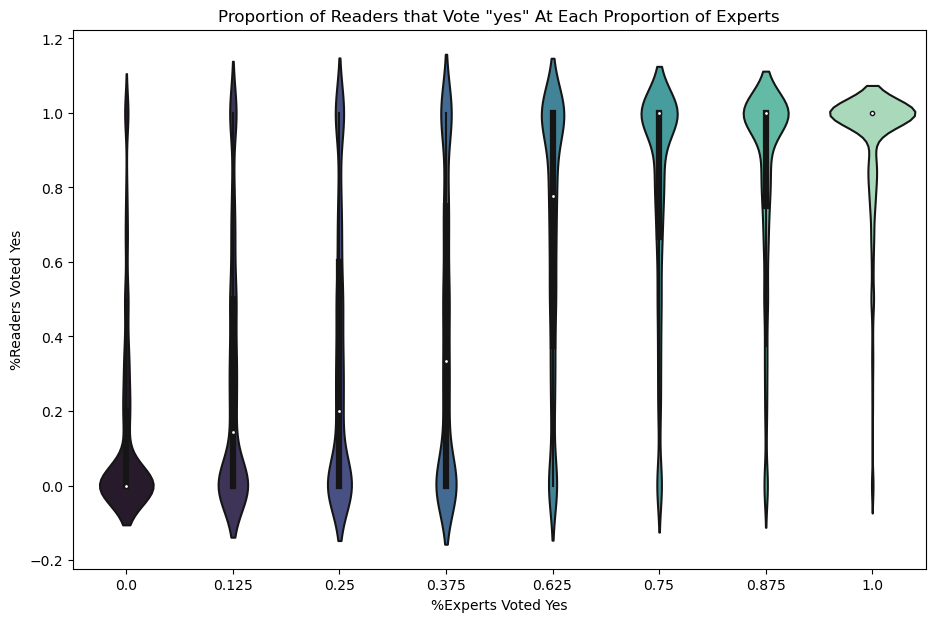

In [45]:
plt.figure(figsize = (11,7))
sns.violinplot(data = refined_data, x = '%Experts Voted Yes', y = '%Readers Voted Yes', palette = 'mako')
plt.title('Proportion of Readers that Vote "yes" At Each Proportion of Experts')

Let's also start checking to make sure that there are _enough_ qualified reads on a label. I will start by graphing the Crowd Accuracy and Reader Accuracy as a function of Qualified Reads. In theory, if there are more readers looking at a case, then the accuracy should be higher simply because more people are reviewing it.

I'll start by numerically reviewing user accuracy at each each discrete number of Qualified Reads:

In [47]:
refined_data['Qualified Reads'].unique()

array([ 2,  3,  1,  4,  6,  5,  7,  0,  8, 10,  9, 12, 11, 13, 14, 15, 16],
      dtype=int64)

In [48]:
for x in range(1,17):
    testd = refined_data.loc[refined_data['Qualified Reads'] == x]['Crowd Accuracy']
    print('The crowd accuracy at ' + str(x) + ' qualified reads is ' +str(testd.mean()))

The crowd accuracy at 1 qualified reads is 0.6219401631912964
The crowd accuracy at 2 qualified reads is 0.6782296650717703
The crowd accuracy at 3 qualified reads is 0.7382031458277792
The crowd accuracy at 4 qualified reads is 0.7548816907879623
The crowd accuracy at 5 qualified reads is 0.81251558214909
The crowd accuracy at 6 qualified reads is 0.8333333333333334
The crowd accuracy at 7 qualified reads is 0.8791413905739618
The crowd accuracy at 8 qualified reads is 0.8895612708018155
The crowd accuracy at 9 qualified reads is 0.9002808988764045
The crowd accuracy at 10 qualified reads is 0.9403409090909091
The crowd accuracy at 11 qualified reads is 0.9197530864197531
The crowd accuracy at 12 qualified reads is 0.9047619047619048
The crowd accuracy at 13 qualified reads is 1.0
The crowd accuracy at 14 qualified reads is 1.0
The crowd accuracy at 15 qualified reads is 1.0
The crowd accuracy at 16 qualified reads is 1.0


Next, I'll try graphing this:

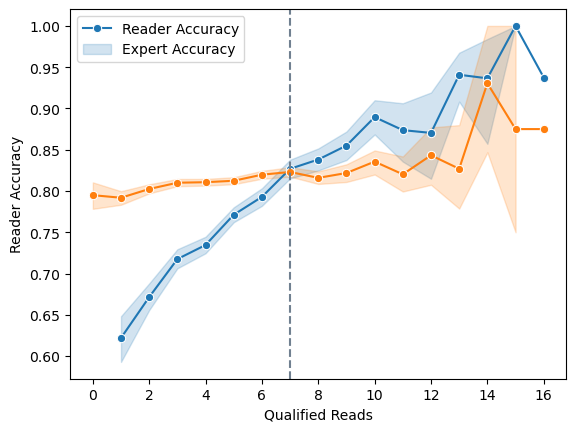

In [49]:
sns.lineplot(data = refined_data, x = 'Qualified Reads', y = 'Reader Accuracy', marker = 'o')
sns.lineplot(data = refined_data, x = 'Qualified Reads', y = 'Expert Accuracy', marker = 'o')
plt.legend(['Reader Accuracy', 'Expert Accuracy'])
plt.axvline(7, c = 'slategray', linestyle = '--')

From this data, we can see that readers actually seem to be more accurate after a certain number of Qualified Reads. This number appears to be about 7 Qualified Reads. This shows that it is quite important to have a high number of Qualified Reads on a case for readers to be more accurate than experts, and it also proves that readers can be relied on even more than experts after a certain number of Qualified Reads.

Let's take a look at what reader accuracy looks like above 7 reads at each proportion that experts responded "yes".

Let's try visualizing crowd agreement when qualified reads is >= 7 at _each point_ of the expert data, seeing as the expert agreement percentages can be considered discretes since they are all fractions of eight (e.g., 0, 0.125, 0.25, etc.). 

In [50]:
above_seven_reads = refined_data.loc[refined_data['Qualified Reads'] >= 7]

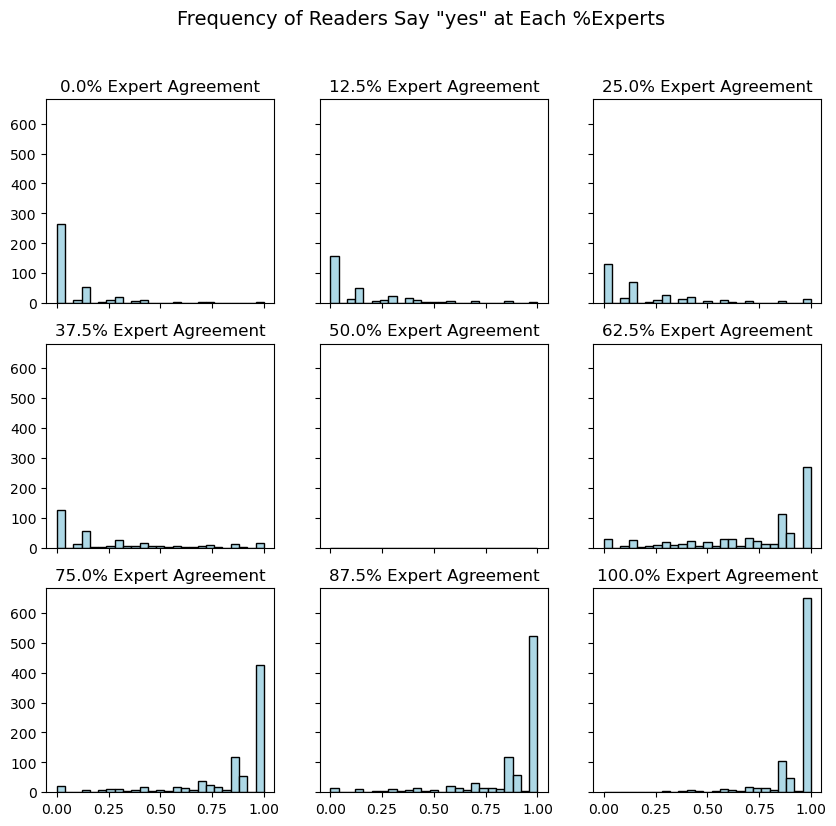

In [51]:
import itertools
fig, axs = plt.subplots(3,3, sharex = True, sharey = True, figsize = (10,9))
iteration = list(np.linspace(0, 1, 9))

coordinates = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)]
plt.suptitle('Frequency of Readers Say "yes" at Each %Experts', fontsize = 14)
#print(iteration)

for i, position in zip(iteration, coordinates):
    data_at_each_expert = above_seven_reads.loc[above_seven_reads['%Experts Voted Yes'] == i]
    axs[position].hist(data_at_each_expert['%Readers Voted Yes'], color = '#add8e6', bins = 25, edgecolor = 'k')
    axs[position].set_title(str(i*100) + '% Expert Agreement')
    #data_at_each_expert = above_five_reads.loc[stripped_data['%Experts Voted Yes'] == 1] 

    #plt.figure(figsize = (8,7))
    #plt.hist(test['%Readers Voted Yes'], bins = 20, color = 'black')
    #plt.show()

I will aggregate the same information into a concise violinplot and the conclusion will become more clear:

In [52]:
#same information using a violin plot

Text(0.5, 1.0, 'Proportion of Readers that Vote "yes" At Each Proportion of Experts')

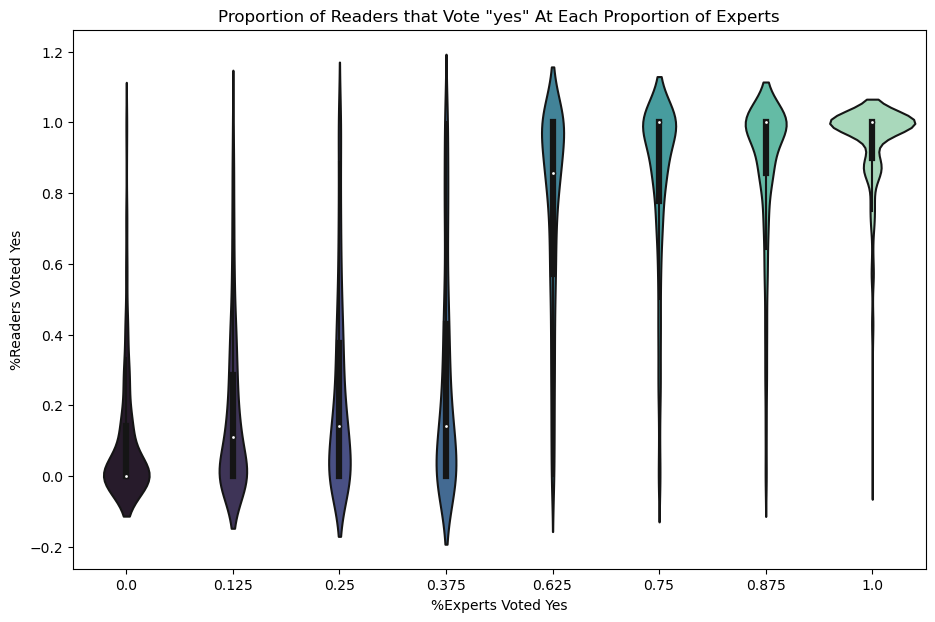

In [53]:
plt.figure(figsize = (11,7))
sns.violinplot(data = above_seven_reads, x = '%Experts Voted Yes', y = '%Readers Voted Yes', palette = 'mako')
plt.title('Proportion of Readers that Vote "yes" At Each Proportion of Experts')

These visualizations show us that when there are more Qualified Readers (at least 7), the percent of readers that answer "yes" correlates extremely well with the amount of experts that say "yes". This may be a good way to break the tie on split-vote data; as long as there are more than 7 readers, then if the experts are split, we can say confidently that at least the readers will have the right answer.

We can illustrate this even better by comparing the reader and expert accuracies at each interval that we used in the violinplot. I'll graph the Crowd Accuracy versus the Expert Accuracy in relation to the proportion of experts that responded "yes" at each interval (1/8, 2/8, etc.).

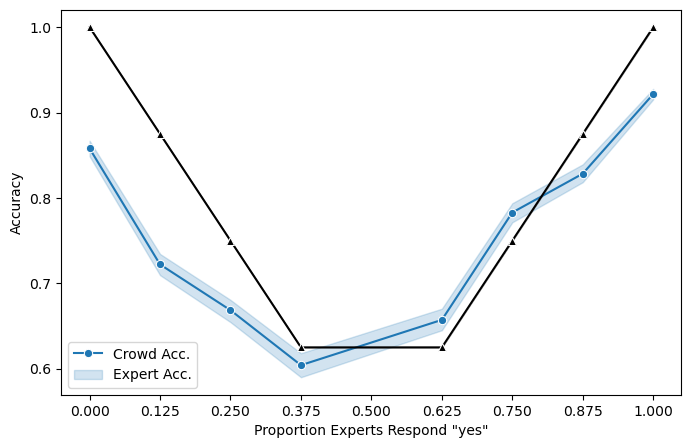

In [55]:
plt.figure(figsize = (8,5))
sns.lineplot(data = refined_data, x = '%Experts Voted Yes', y = 'Reader Accuracy', marker = 'o')
sns.lineplot(data = refined_data, x = '%Experts Voted Yes', y = 'Expert Accuracy', marker = '^', color = 'black')
plt.xlabel('Proportion Experts Respond "yes"')
plt.ylabel('Accuracy')
plt.legend(['Crowd Acc.', 'Expert Acc.'])
plt.xticks(np.linspace(0,1,9)) # <--- set the ticks first
plt.show()

Note that I have ommitted the split case (Proportion 0.5) because Crowd accuracy is incalculable at that point. These graphs show that Crowd accuracy is greater than expert accuracy only at proportions of 0.625 and 0.75. Not very significant. 

However, what if we try using the lower limit of 7 readers that was found earlier to be significant? I test this out with the "above seven readers" dataset:

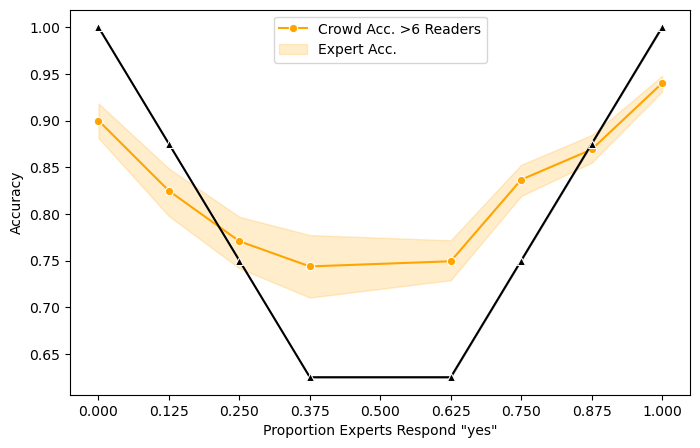

In [56]:
plt.figure(figsize = (8,5))
sns.lineplot(data = above_seven_reads, x = '%Experts Voted Yes', y = 'Reader Accuracy', marker = 'o', color = 'orange')
sns.lineplot(data = above_seven_reads, x = '%Experts Voted Yes', y = 'Expert Accuracy', marker = '^', color = 'black')
plt.xlabel('Proportion Experts Respond "yes"')
plt.ylabel('Accuracy')
plt.legend(['Crowd Acc. >6 Readers', 'Expert Acc.'])
plt.xticks(np.linspace(0,1,9)) # <--- set the ticks first
plt.show()

As was found in the first graph created, The average reader accuracy is greatly increased if we go above seven reads. The accuracy at each proportion significantly increases in this case, surpassing the experts at proportions of 0.25, 0.375, 0.625, 0.75, and 0.875. As the number of Qualified Readers increases, the accuracy increases. Keep in mind that there is no data available for the case when the Proportion of Experts that say "Yes" = 0.5; however, the relationship that we have plotted is a good indicator that the crowd may be able to be accurate enough to break these tie cases. 

### In essence, we can say that Qualified Readers agree with Experts, but their agreement is only reliable when there are multiple Qualified Readers to give their opinion on a medical image.

# Exploring Crowd Reader Accuracy

Here, I'll review other ways to explore crowd accuracy to look for relationships

In [57]:
#I create this quick dataset because it's an easy way to represent the proportions where experts respond "yes"
experts = np.linspace(0,1,9)
experts

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ])

In [59]:
refined_data.corr()

ValueError: could not convert string to float: 'https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B14_time139137_medoid_vote2.jpg'

It's always helpful to start with a quick correlation matrix to look for relationships:

In [58]:
mask = np.triu(refined_data.corr())
sns.heatmap(refined_data.corr(), cmap = 'viridis', mask = mask)

ValueError: could not convert string to float: 'https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B14_time139137_medoid_vote2.jpg'

We can see immediately that there are a few notable relationships, including Expert/Crowd Agreement, Expert/Crowd Accuracy, and a negative relationship between Crowd Accuracy and Difficulty. Below, I explore a few of these numerically:

In [207]:
experts
crowd_list = []
for i in experts:
    crowd_accuracy = refined_data.loc[refined_data['%Experts Voted Yes'] == i]['Crowd Accuracy'].mean()
    crowd_list.append(crowd_accuracy)
    print('The crowd accuracy at ' +str(i)+ ' proportion of experts vote yes is ' +str(crowd_accuracy))

The crowd accuracy at 0.0 proportion of experts vote yes is 0.885
The crowd accuracy at 0.125 proportion of experts vote yes is 0.7393333333333333
The crowd accuracy at 0.25 proportion of experts vote yes is 0.685
The crowd accuracy at 0.375 proportion of experts vote yes is 0.612
The crowd accuracy at 0.5 proportion of experts vote yes is nan
The crowd accuracy at 0.625 proportion of experts vote yes is 0.6856666666666666
The crowd accuracy at 0.75 proportion of experts vote yes is 0.811
The crowd accuracy at 0.875 proportion of experts vote yes is 0.859
The crowd accuracy at 1.0 proportion of experts vote yes is 0.9486666666666667


In [208]:
agreement_list = []
for i in experts:
    crowd_agreement = refined_data.loc[refined_data['%Experts Voted Yes'] == i]['Agreement'].mean()
    print('The crowd agreement at ' +str(i)+ ' proportion of experts vote yes is ' +str(crowd_agreement))
    agreement_list.append(crowd_agreement)

The crowd agreement at 0.0 proportion of experts vote yes is 0.9186908049848402
The crowd agreement at 0.125 proportion of experts vote yes is 0.8689885057471216
The crowd agreement at 0.25 proportion of experts vote yes is 0.8607674497786804
The crowd agreement at 0.375 proportion of experts vote yes is 0.8622614445574711
The crowd agreement at 0.5 proportion of experts vote yes is nan
The crowd agreement at 0.625 proportion of experts vote yes is 0.8566887772194256
The crowd agreement at 0.75 proportion of experts vote yes is 0.8897751756440246
The crowd agreement at 0.875 proportion of experts vote yes is 0.9034580407890309
The crowd agreement at 1.0 proportion of experts vote yes is 0.9436503355704701


We can start by graphing crowd agreement at each proportion that experts vote "yes" below:

Text(0, 0.5, 'Crowd Agreement')

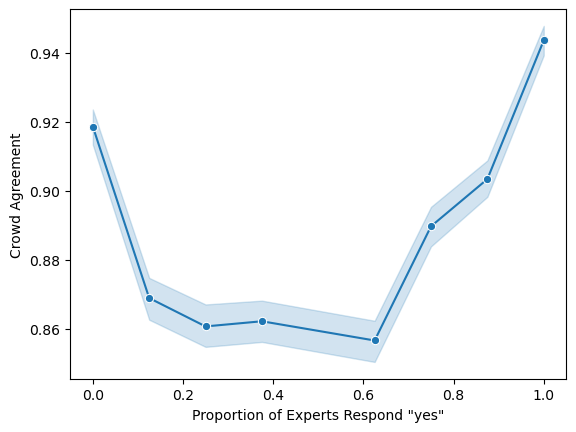

In [209]:
sns.lineplot(data = refined_data, x = '%Experts Voted Yes', y = 'Agreement', marker = 'o')
plt.xlabel('Proportion of Experts Respond "yes"')
plt.ylabel('Crowd Agreement')

Just visually, there seems to be a parabolic correlation between the two variables. There is a significant drop in agreement as the expert proportion approaches a split. Using information from "Quality Control of Crowd Labeling through Expert Evaluation" by Khattak and Salleb-Aouissi, Centaur Labs could use a form of ELICE (Expert Label Injected Crowd Estimation) that focuses their experts only on very difficult medical images. This would allow for experts to vette difficult images, while leaving the crowd to label other, easier images. I believe this will allow for Centaur Labs to cut back on costs needed to pay Experts while also giving them enough data from Readers on the easier images. As shown by the correlations, readers can be as accurate as experts, especially on the easier data.

In [210]:
expert_list = []
for i in experts:
    expert_accuracy = refined_data.loc[refined_data['%Experts Voted Yes'] == i]['Expert Accuracy'].mean()
    print('The expert accuracy at ' +str(i)+ ' proportion of experts vote yes is ' +str(expert_accuracy))
    expert_list.append(expert_accuracy)

The expert accuracy at 0.0 proportion of experts vote yes is 1.0
The expert accuracy at 0.125 proportion of experts vote yes is 0.875
The expert accuracy at 0.25 proportion of experts vote yes is 0.75
The expert accuracy at 0.375 proportion of experts vote yes is 0.625
The expert accuracy at 0.5 proportion of experts vote yes is nan
The expert accuracy at 0.625 proportion of experts vote yes is 0.625
The expert accuracy at 0.75 proportion of experts vote yes is 0.75
The expert accuracy at 0.875 proportion of experts vote yes is 0.875
The expert accuracy at 1.0 proportion of experts vote yes is 1.0


Next, I'll graph the Reader Accuracy and Expert Accuracy as a function of difficulty. 

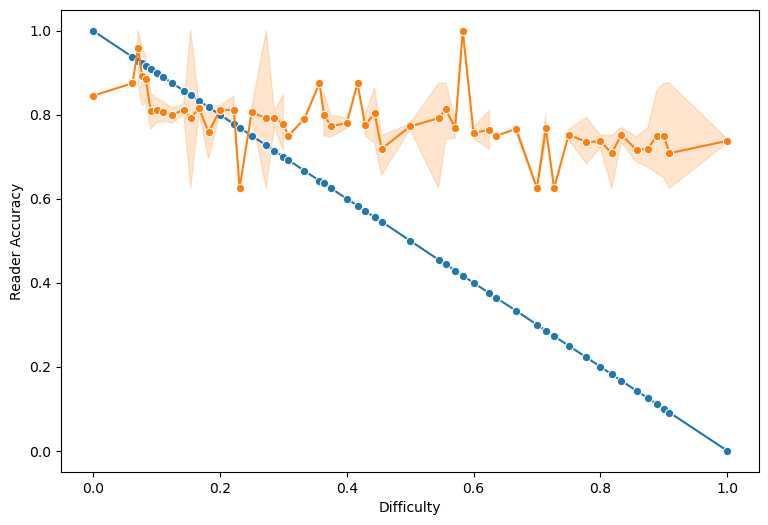

In [65]:
plt.figure(figsize = (9,6))
sns.lineplot(data = refined_data, x = 'Difficulty', y = 'Reader Accuracy', marker = 'o')
#sns.lineplot(data = above_seven_reads, x = "Difficulty", y = 'Reader Accuracy', marker = 'o')
sns.lineplot(data = refined_data, x = 'Difficulty', y = 'Expert Accuracy', marker = 'o')
plt.show()

While Expert Accuracy remains somewhat constant, Reader Accuracy is actually higher than Expert up until a 0.2 level of Difficulty. Reader Accuracy goes down as a linear function of difficulty, while expert accuracy doesn't drop below 0.6. This graph shows that it may be effective to use the crowd to label cases considered less difficult, while the experts are reserved for more difficult cases. Specializing their roles might save on costs.

Finally, I want to explore the relationship between Reader Accuracy and Expert Accuracy, so I graph the data from both the normal dataset and the data with Qualified Reads 7 and above.

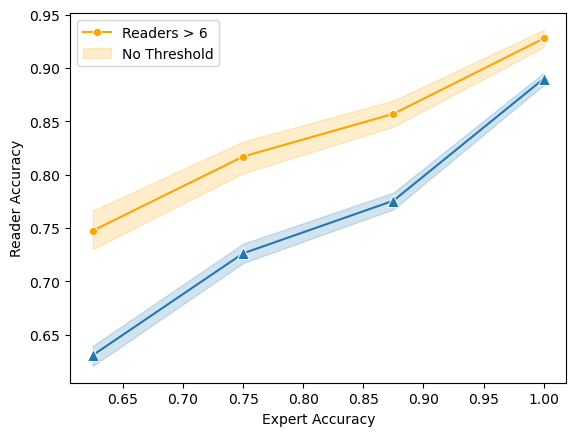

In [66]:
sns.lineplot(data = above_seven_reads, x = 'Expert Accuracy', y = 'Reader Accuracy', marker = 'o', color ='orange')
sns.lineplot(data = refined_data, x = 'Expert Accuracy', y = 'Reader Accuracy', marker = '^',markersize = 8)
plt.legend(['Readers > 6', 'No Threshold'])

Though both have a linear relationship with Expert Accuracy, again, we can see that putting a threshold on the number of readers needed greatly increases the accuracy. In some places, it can even increase accuracy by 12 percent!

# Exploratory Data Analysis 2: Correlation

What other conclusions can we draw from the data? Using a correlation matrix, I try to see if there are any correlations between variables

The above correlation matrix also shows that, given a medical image, the proportion of readers that vote yes is positively correlated with the proportion of experts that vote yes. Correlation between expert votes and reader votes could mean that Qualified Readers have a significant chance of getting the right answer on a medical image.

Finally, I want a practical way to display this correlation. I'm going to start by finding the __average Qualified Readers that say yes__ at each proportion of experts. I create a DataFrame of this data to graph later.

In [75]:
experts = above_five_reads['%Experts Voted Yes'].unique()
experts.sort()

averages = []

for i in experts:
    avg = above_five_reads.loc[above_five_reads['%Experts Voted Yes'] == i]['%Readers Voted Yes'].mean()
    averages.append(avg)
    
data = {'Expert Proportions': experts,
            'Reader Avg Proportions': averages}

df = pd.DataFrame(data)

Let's use a Linear Regression to take a good look at the data and see how linear the data is.

In [76]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept = True) #lin_reg is the local name to the combination of the function and its hyperparemeters
x = df[['Expert Proportions']]
y  = df[['Reader Avg Proportions']] #double brackets necessary for dimensionality
lin_reg.fit(x, y)
x[['Expert Proportions']].min()

Expert Proportions    0.0
dtype: float64

C:\Users\micha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


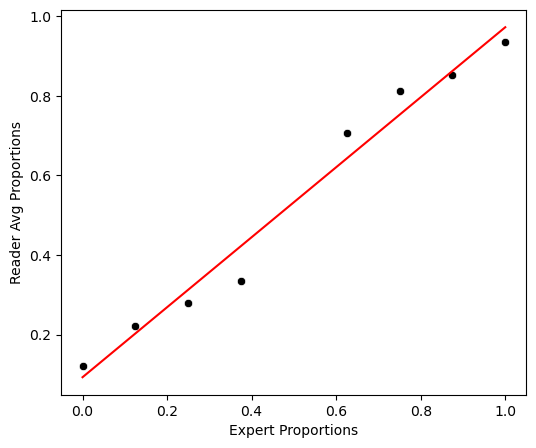

In [78]:
x_range = [x.min(), x.max()]
y_pred = lin_reg.predict(x_range)

x_range

plt.figure(figsize = (6,5))
sns.scatterplot(data = df, x = 'Expert Proportions', y = 'Reader Avg Proportions', color = 'k')
#plotting the regression
plt.plot(x_range, y_pred, label = 'Model', color = 'r')
plt.show()

In [79]:
#Retrieving the coefficient of determination for this dataset(R2)
print('The coefficient of determination of the first plot is ' + str(lin_reg.score(x,y)))

The coefficient of determination of the first plot is 0.9744855955846627


Here I'll find the Pearson coefficient as well as the p-value to determine statistical significance:

In [80]:
from scipy.stats import pearsonr
stats = pearsonr(df['Expert Proportions'], df['Reader Avg Proportions'])
print('The respective Pearson coefficient and p-value are: ' +str(stats[0]) + ', ' +str(stats[1]))

The respective Pearson coefficient and p-value are: 0.9871603697397209, 5.240901570094218e-06


The coefficients show that the line is a good model for this data, and the p-value being so close to zero tells us that the probability of this correlation happening by chance is next to zero. 

Remember: __all of this data is when there are more than 5 readers!__ This data brilliantly shows that if we take the aggregated average of the readers who respond to medical images with "yes", it correlates very well with how much experts agree. This helps us prove that readers agree with experts and are a reliable source of information.

However, just to see, let's find out what the correlation is when there are __any number of readers.__ I expect the correlation to be much lower because there must be plenty of interference from image data that just has one reader (who might've just completely missed the mark). 

In [81]:
test_averages = []

for i in experts:
    avg = refined_data.loc[refined_data['%Experts Voted Yes'] == i]['%Readers Voted Yes'].mean()
    test_averages.append(avg)
    
test_data = {'Expert Proportions': experts,
            'Reader Avg Proportions': test_averages}

test_df = pd.DataFrame(test_data)
test_df

,Expert Proportions,Reader Avg Proportions
0,0.000,0.142018
1,0.125,0.277869
2,0.250,0.331462
3,0.375,0.395844
4,0.625,0.657219
5,0.750,0.782979
6,0.875,0.828461
7,1.000,0.921657


C:\Users\micha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


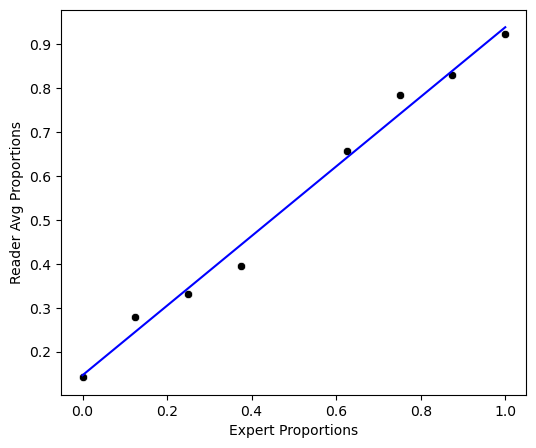

In [82]:
lin_reg = LinearRegression(fit_intercept = True) #lin_reg is the local name to the combination of the function and its hyperparemeters
a = test_df[['Expert Proportions']]
b  = test_df[['Reader Avg Proportions']] #double brackets necessary for dimensionality
lin_reg.fit(a, b)

a_range = [a.min(), a.max()]
b_pred = lin_reg.predict(a_range)

plt.figure(figsize = (6,5))
sns.scatterplot(data = test_df, x = 'Expert Proportions', y = 'Reader Avg Proportions', color = 'k')
#plotting the regression
plt.plot(a_range, b_pred, label = 'Model', color = 'b')
plt.show()

In [83]:
print('The coefficient of determination of the second plot is ' + str(lin_reg.score(a,b)))

The coefficient of determination of the second plot is 0.9899410930953053


In [84]:
from scipy.stats import pearsonr
stats = pearsonr(test_df['Expert Proportions'], test_df['Reader Avg Proportions'])
print('The respective Pearson coefficient and p-value are: ' +str(stats[0]) + ', ' +str(stats[1]))

The respective Pearson coefficient and p-value are: 0.9949578348328663, 3.192621419825068e-07


The coefficients show that this data fits almost perfectly to a positive line, and the p-value being __even closer__ to zero tells us that the probability of this correlation happening by chance is extremely small, and therefore the data is significant.

This is extremely interesting. Is there a way to explain why the correlation coefficient is much higher when we __reduce__ the threshold of readers to read a medical image? Perhaps this is due to the fact that we're taking the averages, and the averages are not proper ways to describe the distribution of the data. This may be because there are plenty of cases where the readers totally miss the mark, but because the rest of the distribution is fairly consistent, the extremes of 0% and 100% just offset the average enough so that the aggregated averages fit well enought to a linear model. 

Although there is a correlation between the _averages_ we have to remember that the average isn't representative of every individual case. Perhaps it is useful still to filter out above a certain level of Qualified Readers. 

# Creating a Model
### Feature Importance

In addition to the customer data, I've also been provided with an admin reads csv file which displays information regarding user identification, what problems a user worked on, their overall accuracy, chosen answers, as well as much more. I'll read that in now.

First, I'm going to prep a 'correct answer' column based off of the expert opinions. This will be part of the response training data for my supervised learning model. This involves prepping the refined_data dataset:

In [67]:
refined_data.head()

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,...,Second Choice Answer,Second Choice Votes,Second Choice Weight,Comments,Experts Voted Yes,%Experts Voted Yes,%Readers Voted Yes,Crowd Accuracy,Reader Accuracy,Expert Accuracy
Case ID,,,,,,,,,,,,,,,,,,,,,
5888087,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386,https://go.centaurlabs.com/problem/5888087,Gold Standard,2,'no','no',0.0,1.0,...,'yes',0,0.0,[],2,0.25,0.0,1,1.0,0.75
5888088,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387,https://go.centaurlabs.com/problem/5888088,Gold Standard,3,'no','no',0.0,1.0,...,'yes',0,0.0,[],0,0.00,0.0,1,1.0,1.00
5888089,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264388,https://go.centaurlabs.com/problem/5888089,Gold Standard,2,'no','no',0.0,1.0,...,'yes',0,0.0,[],0,0.00,0.0,1,1.0,1.00
5888090,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264389,https://go.centaurlabs.com/problem/5888090,Gold Standard,1,'no','no',0.0,1.0,...,'yes',0,0.0,[],0,0.00,0.0,1,1.0,1.00
5888092,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:48 PM,3264391,https://go.centaurlabs.com/problem/5888092,Gold Standard,4,'no','no',0.0,1.0,...,'yes',0,0.0,[],0,0.00,0.0,1,1.0,1.00


In [68]:
def correct_answer(data):
    answer = data['Correct Label']
    return answer

In [69]:
refined_data['correct answer'] = refined_data.apply(correct_answer, axis = 1)

Now that that's set, I'll prep the reads column:

In [70]:
reads = pd.read_csv('1345_admin_reads.csv')

In [71]:
reads.head()

,topic_id,problem_id,user_id,read_id,labeling_state,patch,score,accuracy,contest_id,mission_id,content_id,chosen_answer,origin,origin_created_at,series,series_index,answerChoiceIds,response_submitted_at,problem_appeared_at
0,1345,5888087,55058,132610888,gold_standard,NaN,100,0.78,8011,NaN,3264386,['no'],https://centaur-customer-uploads.s3.us-east-1....,2021-07-26 21:41:47.756010+00:00,NaN,NaN,[25796611],2022-04-12 09:20:24.912000+00:00,2022-04-12 09:20:24.415999+00:00
1,1345,5888087,248277,107696869,gold_standard,NaN,100,0.76,6437,NaN,3264386,['no'],https://centaur-customer-uploads.s3.us-east-1....,2021-07-26 21:41:47.756010+00:00,NaN,NaN,[25796611],2021-12-04 15:00:58.596999+00:00,2021-12-04 15:00:56.760999+00:00
2,1345,5888088,19769,60673858,gold_standard,NaN,100,0.78,5183,NaN,3264387,['no'],https://centaur-customer-uploads.s3.us-east-1....,2021-07-26 21:41:47.824498+00:00,NaN,NaN,[25796612],2021-08-09 07:41:17.754000+00:00,2021-08-09 07:41:16.961000+00:00
3,1345,5888088,237039,99676200,gold_standard,NaN,100,0.80,6151,NaN,3264387,['no'],https://centaur-customer-uploads.s3.us-east-1....,2021-07-26 21:41:47.824498+00:00,NaN,NaN,[25796612],2021-11-01 12:05:16.948999+00:00,2021-11-01 12:05:16.076000+00:00
4,1345,5888088,280445,141519169,gold_standard,NaN,100,0.76,9076,NaN,3264387,['no'],https://centaur-customer-uploads.s3.us-east-1....,2021-07-26 21:41:47.824498+00:00,NaN,NaN,[25796612],2022-06-10 12:16:45.950000+00:00,2022-06-10 12:16:45.112000+00:00


In [72]:
reads = reads[['problem_id', 'user_id', 'accuracy', 'chosen_answer']]

In [73]:
reads['user_id'].unique()

array([ 55058, 248277,  19769, ..., 272329, 270115, 152869], dtype=int64)

In [74]:
len(reads['user_id'].unique())

1034

In [76]:
reads

,problem_id,user_id,accuracy,chosen_answer
0,5888087,55058,0.78,['no']
1,5888087,248277,0.76,['no']
2,5888088,19769,0.78,['no']
3,5888088,237039,0.80,['no']
4,5888088,280445,0.76,['no']
...,...,...,...,...
152055,5918379,19769,0.82,['yes']
152056,5918379,53129,0.78,['yes']
152057,5918379,102777,0.84,['yes']
152058,5918379,137347,0.76,['yes']


In [122]:
x_table = pd.pivot_table(data = reads, index = 'problem_id', columns = 'user_id', aggfunc = 'mean')
x_table['correct answer'] = refined_data['Correct Label']

In [123]:
x_table

accuracy                                                   ...  \
user_id        1196 1858 2581 2815 2861 7280 11697 11715 15245 19769  ...   
problem_id                                                            ...   
5888087         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5888088         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  0.78  ...   
5888089         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5888090         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5888091         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  0.80  ...   
...             ...  ...  ...  ...  ...  ...   ...   ...   ...   ...  ...   
5918374         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5918375         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5918376        0.76  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5918377         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  0.86  ...   
5918379         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  0.82  ...   

           chosen_answer                                                   \
user_id           292198 292506 292546 292650 292669 292741 292812 292855   
problem_id                                                                  
5888087              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888088              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888089              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888090              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888091              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...                  ...    ...    ...    ...    ...    ...    ...    ...   
5918374              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918375              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918376              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918377              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918379              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                  correct answer  
user_id    293188                 
problem_id                        
5888087       NaN           'no'  
5888088       NaN           'no'  
5888089       NaN           'no'  
5888090       NaN           'no'  
5888091       NaN            NaN  
...           ...            ...  
5918374       NaN          'yes'  
5918375       NaN           'no'  
5918376       NaN           'no'  
5918377       NaN            NaN  
5918379       NaN          'yes'  

[30013 rows x 2069 columns]

In [124]:
x_table.shape

(30013, 2069)

There are lots of NaN values in the correct answer column, so I need to filter those out:

In [125]:
x_table = x_table.loc[(x_table['correct answer'].notna())]

Notice the number of problem_ids in x_table is smaller than the number in refined_data. This means that there are 242 problem ids that are not found in the user data.

Here I'll create my Y_test response column for my ML model and drop the correct answer column from the x_table so I can isolate features:

In [126]:
Y_test = x_table['correct answer']

In [127]:
print(x_table.shape)
print(Y_test.shape)
#same size, ready to go

(23758, 2069)
(23758,)


I create a pandas series of the full user results just in case I need it later:

### One-Hot Encoding

I've successfully created a 'correct answer' column, which can be seen in the x_table dataframe. However, I will need to one-hot encode this in order to use it in a ML model. This means assigning values of 0 and 1 to 'no' and 'yes' respectively. This is easy because 'no' and 'yes' are binary variables.

In [128]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [129]:
Y_test_encoded = le.fit_transform(Y_test)

In [130]:
print(len(Y_test_encoded))
Y_test_encoded

23758


array([0, 0, 0, ..., 0, 0, 1])

In [131]:
x_table['correct answer'] = Y_test_encoded

C:\Users\micha\AppData\Local\Temp\ipykernel_46708\3955586410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_table['correct answer'] = Y_test_encoded


In [132]:
x_table

accuracy                                                   ...  \
user_id        1196 1858 2581 2815 2861 7280 11697 11715 15245 19769  ...   
problem_id                                                            ...   
5888087         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5888088         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  0.78  ...   
5888089         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5888090         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5888092         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  0.82  ...   
...             ...  ...  ...  ...  ...  ...   ...   ...   ...   ...  ...   
5918373         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5918374         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5918375         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5918376        0.76  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5918379         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  0.82  ...   

           chosen_answer                                                   \
user_id           292198 292506 292546 292650 292669 292741 292812 292855   
problem_id                                                                  
5888087              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888088              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888089              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888090              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888092              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...                  ...    ...    ...    ...    ...    ...    ...    ...   
5918373              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918374              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918375              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918376              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918379              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                  correct answer  
user_id    293188                 
problem_id                        
5888087       NaN              0  
5888088       NaN              0  
5888089       NaN              0  
5888090       NaN              0  
5888092       NaN              0  
...           ...            ...  
5918373       NaN              1  
5918374       NaN              1  
5918375       NaN              0  
5918376       NaN              0  
5918379       NaN              1  

[23758 rows x 2069 columns]

We've successfully one-hot-encoded the data into zeros and ones.

In [108]:
full_user_results = pd.Series(Y_test_encoded, index = Y_test.index)

In [109]:
full_user_results

0         0
1         0
2         0
3         0
4         0
         ..
152055    1
152056    1
152057    1
152058    1
152059    0
Length: 152060, dtype: int64

In [110]:
x_table['correct answer'].value_counts()

correct answer
'yes'    11945
'no'     11813
Name: count, dtype: int64

Creating encoded 'correct answer' column for x_table dataset:

In [119]:
Y_test

0         0
1         0
2         0
3         0
4         0
         ..
152055    1
152056    1
152057    1
152058    1
152059    0
Name: chosen_answer, Length: 152060, dtype: int32

In [120]:
x_table['correct answer'] = Y_test.copy()

C:\Users\micha\AppData\Local\Temp\ipykernel_46708\3124281502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_table['correct answer'] = Y_test.copy()


In [121]:
x_table['correct answer']

problem_id
5888087   NaN
5888088   NaN
5888089   NaN
5888090   NaN
5888092   NaN
           ..
5918373   NaN
5918374   NaN
5918375   NaN
5918376   NaN
5918379   NaN
Name: correct answer, Length: 23758, dtype: float64

In [112]:
x_table.loc[x_table['correct answer'].isna()]

accuracy                                                   ...  \
user_id        1196 1858 2581 2815 2861 7280 11697 11715 15245 19769  ...   
problem_id                                                            ...   
5888087         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5888088         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  0.78  ...   
5888089         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5888090         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5888092         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  0.82  ...   
...             ...  ...  ...  ...  ...  ...   ...   ...   ...   ...  ...   
5918373         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5918374         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5918375         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5918376        0.76  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5918379         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  0.82  ...   

           chosen_answer                                                   \
user_id           292198 292506 292546 292650 292669 292741 292812 292855   
problem_id                                                                  
5888087              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888088              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888089              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888090              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888092              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...                  ...    ...    ...    ...    ...    ...    ...    ...   
5918373              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918374              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918375              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918376              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5918379              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                  correct answer  
user_id    293188                 
problem_id                        
5888087       NaN            NaN  
5888088       NaN            NaN  
5888089       NaN            NaN  
5888090       NaN            NaN  
5888092       NaN            NaN  
...           ...            ...  
5918373       NaN            NaN  
5918374       NaN            NaN  
5918375       NaN            NaN  
5918376       NaN            NaN  
5918379       NaN            NaN  

[23758 rows x 2069 columns]

Because there are lots of NaN values in the dataframe and the Random Forest Classifier won't work with them, I'm going to fill them all with zeros.

In [169]:
x_table.fillna(0, inplace = True)

C:\Users\micha\AppData\Local\Temp\ipykernel_27744\2277183686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_table.fillna(0, inplace = True)


### Merging

Here I'm going to merge reads and the customer data into one dataframe:

In [170]:
#use a left join with results_data that throws out split votes. Do not use split_votes when creating matrix or merge tables

In [171]:
merged_data = pd.merge(refined_data, reads, how = 'right', right_on = 'problem_id', left_on = refined_data.index)

In [172]:
merged_data

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,...,%Experts Voted Yes,%Readers Voted Yes,Crowd Accuracy,Reader Accuracy,Expert Accuracy,correct answer,problem_id,user_id,accuracy,chosen_answer
0,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386.0,https://go.centaurlabs.com/problem/5888087,Gold Standard,2.0,'no','no',0.0,1.0,...,0.250,0.0,1.0,1.0,0.750,'no',5888087,55058,0.78,['no']
1,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386.0,https://go.centaurlabs.com/problem/5888087,Gold Standard,2.0,'no','no',0.0,1.0,...,0.250,0.0,1.0,1.0,0.750,'no',5888087,248277,0.76,['no']
2,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387.0,https://go.centaurlabs.com/problem/5888088,Gold Standard,3.0,'no','no',0.0,1.0,...,0.000,0.0,1.0,1.0,1.000,'no',5888088,19769,0.78,['no']
3,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387.0,https://go.centaurlabs.com/problem/5888088,Gold Standard,3.0,'no','no',0.0,1.0,...,0.000,0.0,1.0,1.0,1.000,'no',5888088,237039,0.80,['no']
4,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387.0,https://go.centaurlabs.com/problem/5888088,Gold Standard,3.0,'no','no',0.0,1.0,...,0.000,0.0,1.0,1.0,1.000,'no',5888088,280445,0.76,['no']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152055,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294678.0,https://go.centaurlabs.com/problem/5918379,Gold Standard,5.0,'yes','yes',0.2,0.8,...,0.625,0.8,1.0,0.8,0.625,'yes',5918379,19769,0.82,['yes']
152056,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294678.0,https://go.centaurlabs.com/problem/5918379,Gold Standard,5.0,'yes','yes',0.2,0.8,...,0.625,0.8,1.0,0.8,0.625,'yes',5918379,53129,0.78,['yes']
152057,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294678.0,https://go.centaurlabs.com/problem/5918379,Gold Standard,5.0,'yes','yes',0.2,0.8,...,0.625,0.8,1.0,0.8,0.625,'yes',5918379,102777,0.84,['yes']
152058,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 22:00:15 PM,3294678.0,https://go.centaurlabs.com/problem/5918379,Gold Standard,5.0,'yes','yes',0.2,0.8,...,0.625,0.8,1.0,0.8,0.625,'yes',5918379,137347,0.76,['yes']


## Feature Importance Matrix Model

I'm going to use a Random Forest Classifier to try to train a model to be able to predict correct responses based on the expert responses that I'm giving it to learn. I start by splitting the data into training and testing data:

In [447]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_table.drop('correct answer', axis = 1), full_user_results, stratify=full_user_results, random_state=42)

Next, I import the Random Forest Classifier from sci-kit learn and fit the forest to the training data. Then, I check the shapes of the training and testing data to make sure they're all the same shapes. By default, the test size is set to 0.25 of the size of the training, and the training is the complement (0.75). This is reflected in the shapes:

In [448]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

C:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


(17818, 1034)
(5940, 1034)
(17818,)
(5940,)


In [449]:
#The test set already has the correct answer, so we test the model on it and get accuracy from it
#When the accuracy is good enough, then we're finally able to use the model on the split-vote data
#Looking for a confidence level for our label

Shapes are the same size, we're good to go for Machine Learning.

In [450]:
importances = forest.feature_importances_
print(importances.max())
reads['user_id'].value_counts()

0.025603104372400584


19769     9228
245612    5672
118064    4481
1196      4298
123180    3109
          ... 
267439       1
264827       1
152115       1
192571       1
152869       1
Name: user_id, Length: 1034, dtype: int64

In [451]:
forest_importances = pd.Series(importances, index=x_table.drop('correct answer', axis = 1).columns.get_level_values(1))
forest_importances.sort_values(ascending = False, inplace = True)
ltd_importances = forest_importances[:50]

std = np.std([tree.feature_importances_[:50] for tree in forest.estimators_[:50]], axis=0)

In [452]:
forest_importances

user_id
19769     0.025603
245612    0.016977
118064    0.014894
123180    0.013609
1196      0.013436
            ...   
261726    0.000000
275649    0.000000
133738    0.000000
256126    0.000000
170302    0.000000
Length: 1034, dtype: float64

Here, I'll plot the 50 most important features, identified by user ID. These must be the users that have the most sway in deciding a correct answer.

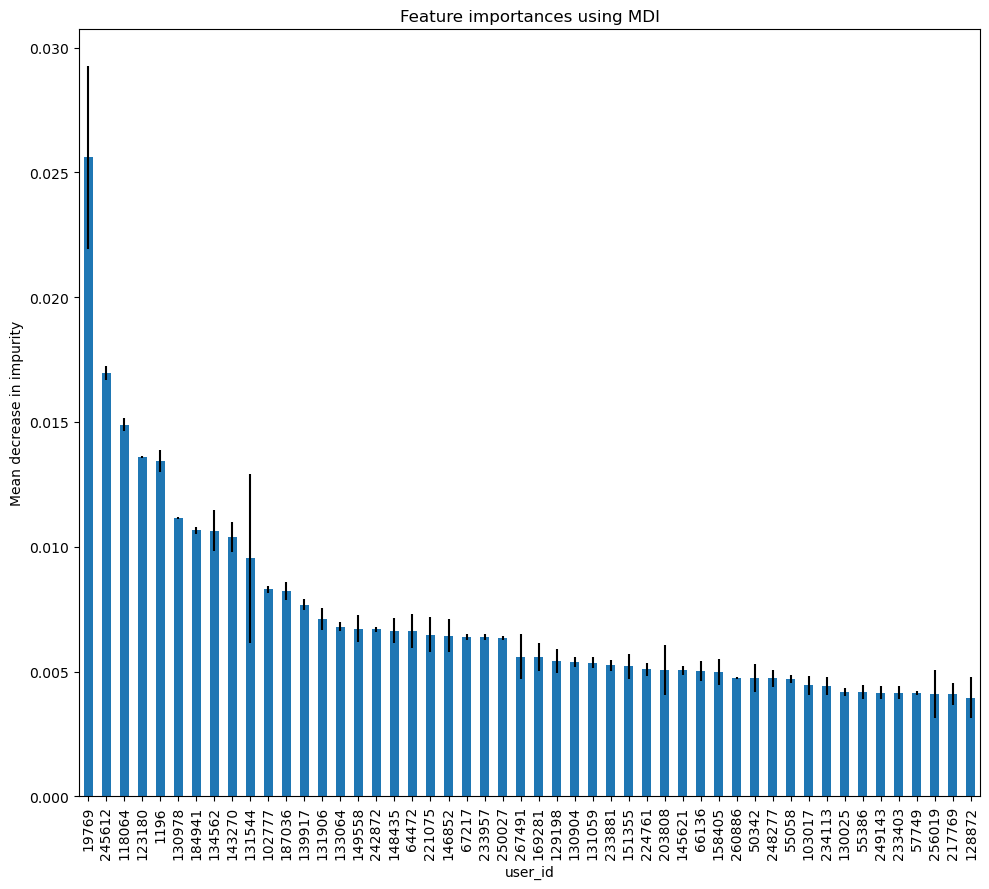

In [453]:
fig, ax = plt.subplots(figsize = (10,9))
ltd_importances.plot.bar(yerr = std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Here we've identified what users are the most important to producing the correct answer. Is there a reason that some users are more important than others? I'll start looking by adding feature_importances as a column to merged_data. 

In [290]:
merged_data = merged_data.merge(forest_importances.rename('importances'), on = 'user_id', how='left')

In [292]:
merged_data.drop(['importances_x', 'importances_y'], axis = 1, inplace = True)

I suspect there is a relationship with the the raw amount of users that produce results as a function of importance, so I added a column to the merged dataframe named "count."

In [293]:
merged_data['count'] = merged_data.groupby('user_id')['user_id'].transform('count')

<AxesSubplot:xlabel='importances', ylabel='count'>

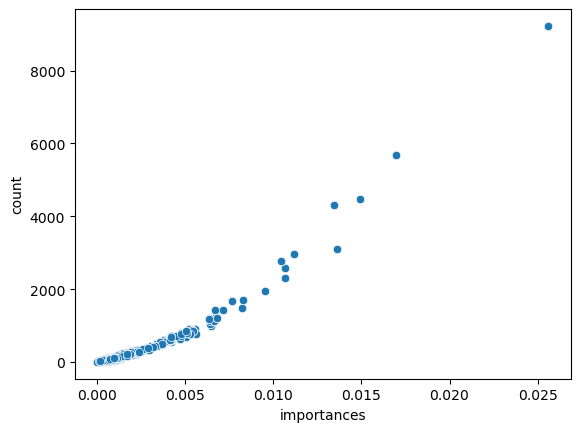

In [295]:
sns.scatterplot(data = merged_data,x = 'importances', y = 'count')

In essence, it seems that the more answers a user puts out, the more importance they are given in the model. The model is almost perfect. This could mean that we should focus on users that put out more answers rather than users that have good accuracy but only put out a marginal amount of labels.

### Random Forest Validity
Here, I'm going to use the score method of the Random Forest Classifier to get a score of the accuracy of our model for the training data and the testing data. If there is a large discrepancy between the training data and the testing data score, then we know the model is not very good for every case.

In [454]:
print('Overall Score is: ' + str(forest.score(x_table.drop('correct answer', axis = 1), full_user_results)))
print('Internal Validity (R^2) = ' +str(forest.score(X_train, y_train)))
print('External Validity (R^2) = ' +str(forest.score(X_test, y_test)))

C:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Overall Score is: 0.8833235120801414


C:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Internal Validity (R^2) = 0.9944438208553148


C:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


External Validity (R^2) = 0.55


We can see that Random Forest Internal validity is almost 1. The model works well on the training data. However, the External validity score is comparatively low, sitting at 0.55, meaning that the model must be pretty overfit on the training data.

The fit might not seem perfect, but it's possible that it is actually acceptable for the type of data we're looking at. According to [this article from Medium](https://towardsdatascience.com/why-linear-regression-is-not-suitable-for-binary-classification-c64457be8e28), humans are difficult to predict and therefore it can be difficult to achieve a high R^2 value (even > 0.5). It would take more research to say definitively whether this is a good model or not.

### Logistic Validity

In [297]:
#Compare Logistic Regression to another validation method?

I use a Logistic Regression to see how good of a model this Random Forest Classifier is. [Here is an article](https://towardsdatascience.com/why-linear-regression-is-not-suitable-for-binary-classification-c64457be8e28) that inspired me to try a logistic regression

In [298]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression(solver='lbfgs')
log_regression.fit(X_train, y_train)

print('Overall Model (R^2) :', format(log_regression.score(x_table.drop('correct answer', axis = 1), full_user_results), '.2f'))
print('Internal validity (R^2) :', format(log_regression.score(X_train,y_train), '.2f'))
print('External validity (R^2) :', format(log_regression.score(X_test,y_test), '.2f'))

C:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Overall Model (R^2) : 0.63
Internal validity (R^2) : 0.64
External validity (R^2) : 0.59


C:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\m

Though the logistic regression is consistent, it still does not have a particularly high R^2 score, so it's hard to say how reliable it might be for our data.

In [299]:
#Scale other features

In [300]:
#Log Regression separates what it knows and what it doesn't
#For classification, use classification algorithms from sklearn, including rforest.
#Deslib algorithms are all classification models

The regression might not seem perfect, but it's actually pretty good! According to [this article from Medium](https://towardsdatascience.com/why-linear-regression-is-not-suitable-for-binary-classification-c64457be8e28), humans are difficult to predict and therefore it can be difficult to achieve a high R^2 value (even > 0.5). I'd say we have a decent fit or the internal and external validity.

### Using Feature_Importances to reduce users and extract Correct Answer
I'm deciding to reduce the number of users for each case to no more than 7. I do this because as we saw in the analytics portion, it only takes 7 Qualified Readers for the crowd to become more accurate than the experts. Therefore, I take the top 7 most important users from each problem. I use a groupby to group them and then I sort according to importances

In [301]:
reads.user_id

0          55058
1         248277
2          19769
3         237039
4         280445
           ...  
152055     19769
152056     53129
152057    102777
152058    137347
152059    250601
Name: user_id, Length: 152060, dtype: int64

In [305]:
group = merged_data.sort_values('importances', ascending = False).groupby('problem_id')[['problem_id','accuracy','importances', 'correct answer', 'user_id','chosen_answer']]

In [306]:
mydf = group.head(7).sort_values('problem_id')

In [307]:
mydf

,problem_id,accuracy,importances,correct answer,user_id,chosen_answer
1,5888087,0.76,0.004734,'no',248277,['no']
0,5888087,0.78,0.004699,'no',55058,['no']
4,5888088,0.76,0.001932,'no',280445,['no']
2,5888088,0.78,0.025603,'no',19769,['no']
3,5888088,0.80,0.000379,'no',237039,['no']
...,...,...,...,...,...,...
152058,5918379,0.76,0.000961,'yes',137347,['yes']
152055,5918379,0.82,0.025603,'yes',19769,['yes']
152057,5918379,0.84,0.008291,'yes',102777,['yes']
152056,5918379,0.78,0.001009,'yes',53129,['yes']


In [255]:
print(mydf.shape)
print(reads.shape)

(141180, 6)
(152060, 4)


Notice that by taking the top 7 users of each problem, we've reduced the number of users on cases by almost 11,000 instances.

In [246]:
mydf['problem_id'].value_counts()

5901577    7
5895204    7
5895120    7
5900537    7
5905711    7
          ..
5903733    1
5892022    1
5913028    1
5913034    1
5903924    1
Name: problem_id, Length: 30013, dtype: int64

In [247]:
test_table = mydf.drop('importances', axis = 1).pivot_table(index = 'problem_id', columns = ['user_id'], aggfunc = 'mean')

In [249]:
test_table['correct answer'] = Y_test
#Using expert answer and majority label answer from "refined_data"

In [251]:
test_table = test_table.loc[test_table['correct answer'].notna()] #throwing out all NaN

In [254]:
testgroup = mydf.sort_values('accuracy', ascending = False).groupby('problem_id').first()
testgroup #top users of each problem_id that have the highest accuracies

,accuracy,importances,correct answer,user_id,chosen_answer
problem_id,,,,,
5888087,0.78,0.004699,'no',55058,['no']
5888088,0.80,0.000379,'no',237039,['no']
5888089,0.88,0.002051,'no',271230,['no']
5888090,0.82,0.000404,'no',138467,['no']
5888091,0.88,0.016977,None,245612,['yes']
...,...,...,...,...,...
5918374,0.84,0.001704,'yes',65046,['yes']
5918375,0.80,0.001117,'no',175195,['yes']
5918376,0.80,0.010651,'no',184941,['yes']


In [257]:
#One hot encoding
test_table['correct answer'] = le.fit_transform(test_table['correct answer'])

C:\Users\micha\AppData\Local\Temp\ipykernel_27744\4191927244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_table['correct answer'] = le.fit_transform(test_table['correct answer'])


In [258]:
test_table.head()

accuracy                                                   ...  \
user_id        1196 1858 2581 2815 2861 7280 11697 11715 15245 19769  ...   
problem_id                                                            ...   
5888087         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5888088         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  0.78  ...   
5888089         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5888090         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   
5888092         NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  0.82  ...   

                                                                           \
user_id    292198 292506 292546 292650 292669 292741 292812 292855 293188   
problem_id                                                                  
5888087       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888088       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888089       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888090       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5888092       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

           correct answer  
user_id                    
problem_id                 
5888087                 0  
5888088                 0  
5888089                 0  
5888090                 0  
5888092                 0  

[5 rows x 1028 columns]

In [267]:
reduced_user_answers = test_table['correct answer']

In [2]:
#Test with top 7 important users that comes from the data analytics portion and use that to test on instead of top 2.

In [4]:
#Predict_probability on split-vote; always evaluate on the unknown data, in this case this is the split-vote data.

In [271]:
#Predicting the response for split-vote using crowd data. That's why creating problem-user matrix. Making ML model for 
#test set made in the traintestsplit
#Split-votes is NOT being evaluated on, so we test on data from the GOLD STANDARD dataframe.

### Comparing Full User Results to Reduced User Results

Now that I've extracted an answer column for the data with reduced users, I'm going to compare this column with the old column that has correct answers based on _all_ the user data (based on reads dataframe that has all 152000 entries).

In [268]:
#sorting
reduced_user_answers.sort_index(inplace = True)
full_user_results.sort_index(inplace = True)

In [269]:
full_user_results.compare(reduced_user_answers)

,self,other
problem_id,,


This means there are __zero__ differences between the two dataframes even when we reduce the number of users to be a maximum of seven for __every case__. This proves that we can reduce the number of users needed per case and still have the _exact same accuracy_ as long as we use the 7 __most important__ users.

In [270]:
print('The full reads dataframe is size ' + str(reads.shape))
print('Using only the top seven most important users, the resulting size is ' + str(mydf.shape))

The full reads dataframe is size (152060, 4)
Using only the top seven most important users, the resulting size is (141180, 6)


### KNORA-E Prediction Modeling

In [10]:
#After, we are ensembling methods to combine methods.
#Take probabilities of both methods, average them, and this gives an ensembled probability for each response variable
#Create first two columns calculated from the weight of the crowd which is scaled to 1
#Calculate probability columns
#Next column is deslib probability
#Final ensemble column gotten from calculating average of columns
#For all models, remove split vote

In [188]:
from deslib.des.knora_e import KNORAE

In [189]:
pool_classifiers = RandomForestClassifier(n_estimators=10)
pool_classifiers.fit(X_train, y_train)

C:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(n_estimators=10)

In [190]:
knorae = KNORAE(pool_classifiers)

In [191]:
#Use same training and testing data from Random Forest. Do not train test split again

In [192]:
knorae.fit(X_train, y_train) #always fit on the training data

KNORAE(pool_classifiers=RandomForestClassifier(n_estimators=10))

In [196]:
predicted_values = knorae.predict(X_test) #predicting on the testing data

In [197]:
predicted_values

array([1, 0, 0, ..., 0, 1, 0])

In [461]:
print('Internal validity (R^2) :', format(forest.score(X_train,y_train), '.2f'))
print('External Validity on Testing Data using KNORA:', format(knorae.score(X_test, y_test), '.2f'))
print('Predicted values Validity (R^2) Using Log Regression:', format(log_regression.score(X_test,predicted_values), '.2f'))
print('Predicted values Validity (R^2) Using Random Forest Classifier:', format(forest.score(X_test,predicted_values), '.2f'))

C:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Internal validity (R^2) : 0.99
External Validity on Testing Data using KNORA: 0.52
Predicted values Validity (R^2) Using Log Regression: 0.59


C:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Predicted values Validity (R^2) Using Random Forest Classifier: 0.69


Checking validity using both Random Forest and Log Regression, we can see that though the model isn't perfect, KNORA-E provides a pretty solid prediction of what correct answers might look like, and it achieves a relatively high value when scored by RFC.

# Ensembling

I'm going to ensemble probabilities here in order to give confidence levels for each of our responses. I'll use a combination of accuracy weights from the old refined data set as well as predicted forest probabilities and KNORA-E probabilities. 

In [341]:
frst_prob = forest.predict_proba(x_table.drop('correct answer', axis = 1))

C:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [342]:
forest.classes_

array([0, 1])

In [360]:
forestdf = pd.DataFrame(frst_prob, index = x_table.index, columns = ['Forest "no"', 'Forest "yes"'])

In [347]:
kn_prob = knorae.predict_proba(x_table.drop('correct answer', axis = 1))

In [351]:
knorae.classes_

array([0, 1])

In [352]:
kn_prob

array([[1.        , 0.        ],
       [0.73787546, 0.26212454],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ]])

In [361]:
knordf = pd.DataFrame(kn_prob, index = x_table.index, columns = ['KNORA-E "no"', 'KNORA-E "yes"'])

I'm going to create a log_prob table, but I'm not sure if I want to use it because I'm unsure of how good of a model the logistic regression is:

In [456]:
log_prob = log_regression.predict_proba(x_table.drop('correct answer', axis = 1))

C:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [457]:
log_prob

array([[0.71558943, 0.28441057],
       [0.69685796, 0.30314204],
       [0.62178364, 0.37821636],
       ...,
       [0.67787083, 0.32212917],
       [0.67760317, 0.32239683],
       [0.57725248, 0.42274752]])

In [374]:
combined = pd.merge(forestdf, knordf, how = 'left', on = forestdf.index)

In [375]:
combined.set_index('key_0', inplace = True)
combined

,"Forest ""no""","Forest ""yes""","KNORA-E ""no""","KNORA-E ""yes"""
key_0,,,,
5888087,0.877667,0.122333,1.000000,0.000000
5888088,0.725220,0.274780,0.737875,0.262125
5888089,0.786524,0.213476,1.000000,0.000000
5888090,0.960000,0.040000,1.000000,0.000000
5888092,0.440133,0.559867,1.000000,0.000000
...,...,...,...,...
5918373,0.990000,0.010000,1.000000,0.000000
5918374,0.141500,0.858500,0.000000,1.000000
5918375,0.930000,0.070000,1.000000,0.000000


I've created probabilities for Forest and KNORA-E and merged them into one dataframe. Now, I'm going to focus on the user accuracies to weigh each problem case.

In [362]:
refined_data.head()

,Origin,Origin Created At,Content ID,URL,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,...,Second Choice Votes,Second Choice Weight,Comments,Experts Voted Yes,%Experts Voted Yes,%Readers Voted Yes,Crowd Accuracy,Reader Accuracy,Expert Accuracy,correct answer
Case ID,,,,,,,,,,,,,,,,,,,,,
5888087,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264386,https://go.centaurlabs.com/problem/5888087,Gold Standard,2,'no','no',0.0,1.0,...,0,0.0,[],2,0.25,0.0,1,1.0,0.75,'no'
5888088,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264387,https://go.centaurlabs.com/problem/5888088,Gold Standard,3,'no','no',0.0,1.0,...,0,0.0,[],0,0.00,0.0,1,1.0,1.00,'no'
5888089,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264388,https://go.centaurlabs.com/problem/5888089,Gold Standard,2,'no','no',0.0,1.0,...,0,0.0,[],0,0.00,0.0,1,1.0,1.00,'no'
5888090,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:47 PM,3264389,https://go.centaurlabs.com/problem/5888090,Gold Standard,1,'no','no',0.0,1.0,...,0,0.0,[],0,0.00,0.0,1,1.0,1.00,'no'
5888092,https://centaur-customer-uploads.s3.us-east-1....,Jul 26 2021 21:41:48 PM,3264391,https://go.centaurlabs.com/problem/5888092,Gold Standard,4,'no','no',0.0,1.0,...,0,0.0,[],0,0.00,0.0,1,1.0,1.00,'no'


Now, I'm going to use the user accuracies given in the customer data to create scaled weights for each problem case. In other words, instead of the weights being the sum of the accuracies, I will normalize all the weights so that they are between 0 and 1.

In [386]:
def scaled_yes_weights(data):
    if data['Majority Label'] == "'yes'":
        percent_yes = data['First Choice Weight']/data['First Choice Votes']
    elif data['Majority Label'] == "'no'":
        if data['Second Choice Votes'] == 0:
            percent_yes = 0
        else:
            percent_yes = data['Second Choice Weight']/data['Second Choice Votes']
    else:
        percent_yes = np.nan
    return percent_yes

def scaled_no_weights(data):
    if data['Majority Label'] == "'no'":
        percent_no = data['First Choice Weight']/data['First Choice Votes']
    elif data['Majority Label'] == "'yes'":
        if data['Second Choice Votes'] == 0:
            percent_no = 0
        else:
            percent_no = data['Second Choice Weight']/data['Second Choice Votes']
    else:
        percent_no = np.nan
    return percent_no

In [387]:
yes_series = refined_data.apply(scaled_yes_weights, axis = 1)
no_series = refined_data.apply(scaled_no_weights, axis = 1)

In [388]:
weights = pd.concat([yes_series, no_series], axis = 1)

In [389]:
weights.columns = ['Yes Weight', 'No Weight']

I'm going to drop all the NaN entries because those represent instances where the crowd number of Qualified Readers was zero.

In [390]:
weights = weights.loc[(weights['Yes Weight'].notna()) | (weights['No Weight'].notna())]

Now, I'll go ahead and merge both dataframes to create my ensembled probabilities.

In [393]:
ensembled_probs = pd.merge(weights, combined, how = 'left', on = weights.index)

In [394]:
ensembled_probs.set_index('key_0', inplace = True)

In [397]:
#rearranging the columns
ensembled_probs = ensembled_probs[['No Weight', 'Yes Weight', 'Forest "no"', 'Forest "yes"', 'KNORA-E "no"', 'KNORA-E "yes"']]

In [398]:
ensembled_probs

,No Weight,Yes Weight,"Forest ""no""","Forest ""yes""","KNORA-E ""no""","KNORA-E ""yes"""
key_0,,,,,,
5888087,0.770,0.000,0.877667,0.122333,1.000000,0.000000
5888088,0.780,0.000,0.725220,0.274780,0.737875,0.262125
5888089,0.850,0.000,0.786524,0.213476,1.000000,0.000000
5888090,0.820,0.000,0.960000,0.040000,1.000000,0.000000
5888092,0.825,0.000,0.440133,0.559867,1.000000,0.000000
...,...,...,...,...,...,...
5918373,0.000,0.800,0.990000,0.010000,1.000000,0.000000
5918374,0.000,0.795,0.141500,0.858500,0.000000,1.000000
5918375,0.000,0.780,0.930000,0.070000,1.000000,0.000000


We've successfully ensembled the probabilities, and we're now prepared to create a new column of probabilities based on the sum averages of all our different methods.

In [404]:
ensembled_probs['"No" confidence'] = (ensembled_probs['No Weight'] + ensembled_probs['Forest "no"'] + ensembled_probs['KNORA-E "no"'])/3

ensembled_probs['"Yes" confidence'] = (ensembled_probs['Yes Weight'] + ensembled_probs['Forest "yes"'] + ensembled_probs['KNORA-E "yes"'])/3

C:\Users\micha\AppData\Local\Temp\ipykernel_27744\2729530957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ensembled_probs['"No" confidence'] = (ensembled_probs['No Weight'] + ensembled_probs['Forest "no"'] + ensembled_probs['KNORA-E "no"'])/3
C:\Users\micha\AppData\Local\Temp\ipykernel_27744\2729530957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ensembled_probs['"Yes" confidence'] = (ensembled_probs['Yes Weight'] + ensembled_probs['Forest "yes"'] + ensembled_probs['KNORA-E "yes"'])/3


I want to assign labels now basedo off of the ensembled scores I've calculated.

In [482]:
def probability_labels(data):
    if data['"No" confidence'] > data['"Yes" confidence']:
        label = "'no'"
    elif data['"Yes" confidence'] > data['"No" confidence']:
        label = "'yes'"
    else:
        label = np.nan
    return label

In [483]:
ensembled_probs['probability label'] = ensembled_probs.apply(probability_labels, axis = 1)

In [489]:
ensembled_probs

,No Weight,Yes Weight,"Forest ""no""","Forest ""yes""","KNORA-E ""no""","KNORA-E ""yes""","""No"" confidence","""Yes"" confidence",probability label
key_0,,,,,,,,,
5888087,0.770,0.000,0.877667,0.122333,1.000000,0.000000,0.882556,0.040778,'no'
5888088,0.780,0.000,0.725220,0.274780,0.737875,0.262125,0.747699,0.178968,'no'
5888089,0.850,0.000,0.786524,0.213476,1.000000,0.000000,0.878841,0.071159,'no'
5888090,0.820,0.000,0.960000,0.040000,1.000000,0.000000,0.926667,0.013333,'no'
5888092,0.825,0.000,0.440133,0.559867,1.000000,0.000000,0.755044,0.186622,'no'
...,...,...,...,...,...,...,...,...,...
5918373,0.000,0.800,0.990000,0.010000,1.000000,0.000000,0.663333,0.270000,'no'
5918374,0.000,0.795,0.141500,0.858500,0.000000,1.000000,0.047167,0.884500,'yes'
5918375,0.000,0.780,0.930000,0.070000,1.000000,0.000000,0.643333,0.283333,'no'


In [486]:
ensembled_probs['probability label'].isna().value_counts()

False    23756
True         2
Name: probability label, dtype: int64

## Merging Probabilities to Original DataFrame

Finally, I want to use the probabilities I found to assign confidence levels and determine labels that I can compare with my original answers. First, I need to throw out all the cases in "refined_data" where there were no Qualified Readers (QR = 0).

In [494]:
zero_readers = refined_data['Qualified Reads'] == 0

In [496]:
refined_data = refined_data.loc[~zero_readers]

And now, to compare:

In [497]:
refined_data['Correct Label'].compare(ensembled_probs['probability label'])

,self,other
5888097,'no','yes'
5888143,'no','yes'
5888168,'no','yes'
5888182,'no','yes'
5888201,'no','yes'
...,...,...
5918299,'yes','no'
5918317,'no','yes'
5918340,'yes','no'
5918350,'yes','no'


In [498]:
2173/23758

0.09146392794006229

Using this information, we can say that our ensembled model is able to return a correct label with a 9% error rate. This may not be the best, but there may be other ways to optimize it to be able to return correct answers more often.

Use ML model to predict user confidence.

Use important users (group of users) who are correct, you can be certain that if that group agrees on something, then they're likely to be even more correct than the experts.